In [ ]:
import os
import librosa
import math
import json
import numpy as np
from sklearn.model_selection import train_test_split
import glob, random

In [ ]:
import os
import json
import math
import librosa
import random

# Set your data path
DATASET_PATH = "C:\\Users\\SAI KARTHIK\\Downloads\\archive (10)\\Data\\genres_original"
JSON_PATH = "data_13.json"
SAMPLE_RATE = 22050
duration = 30  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * duration


def save_melspec(dataset_path, json_path, n_fft=2048, hop_length=512, num_segments=40, n_mels=128):
    data = {
        "mapping": [],
        "mels": [],
        "labels": []
    }
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mel_vectors_per_segments = math.ceil(num_samples_per_segment / hop_length)

    # Genres and number of files to randomly select for each genre
    genres = ['blues', 'classical']
    num_files_per_genre = 65

    for genre in genres:
        # Get filenames for the current genre
        genre_path = os.path.join(dataset_path, genre)
        filenames = os.listdir(genre_path)

        # Randomly select files for this genre
        selected_files = random.sample(filenames, num_files_per_genre)

        # Add the genre to the mapping
        data["mapping"].append(genre)

        print("\nProcessing {}...".format(genre))

        for filename in selected_files:
            file_path = os.path.join(genre_path, filename)
            signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

            # Process segments extracting mels and storing data
            for s in range(num_segments):
                start_sample = num_samples_per_segment * s
                finish_sample = start_sample + num_samples_per_segment

                # Extract Mel spectrogram
                mels = librosa.feature.melspectrogram(y=signal[start_sample:finish_sample],
                                                      sr=SAMPLE_RATE,
                                                      n_fft=n_fft,
                                                      n_mels=n_mels,
                                                      hop_length=hop_length)
                mels = mels.T

                # Check if the number of Mel vectors matches the expected number
                if len(mels) == expected_num_mel_vectors_per_segments:
                    data["mels"].append(mels.tolist())
                    data["labels"].append(len(data["mapping"]) - 1)
                    print("Processed {}, segment: {}".format(filename, s))

    # Save data to JSON file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_melspec(DATASET_PATH, JSON_PATH, num_segments=40)



Processing blues...
Processed blues.00054.wav, segment: 0
Processed blues.00054.wav, segment: 1
Processed blues.00054.wav, segment: 2
Processed blues.00054.wav, segment: 3
Processed blues.00054.wav, segment: 4
Processed blues.00054.wav, segment: 5
Processed blues.00054.wav, segment: 6
Processed blues.00054.wav, segment: 7
Processed blues.00054.wav, segment: 8
Processed blues.00054.wav, segment: 9
Processed blues.00054.wav, segment: 10
Processed blues.00054.wav, segment: 11
Processed blues.00054.wav, segment: 12
Processed blues.00054.wav, segment: 13
Processed blues.00054.wav, segment: 14
Processed blues.00054.wav, segment: 15
Processed blues.00054.wav, segment: 16
Processed blues.00054.wav, segment: 17
Processed blues.00054.wav, segment: 18
Processed blues.00054.wav, segment: 19
Processed blues.00054.wav, segment: 20
Processed blues.00054.wav, segment: 21
Processed blues.00054.wav, segment: 22
Processed blues.00054.wav, segment: 23
Processed blues.00054.wav, segment: 24
Processed blue

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 31, 126, 64)         │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 31, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 7, 31, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 7, 31, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,890 (167.54 KB)

 Trainable params: 42,634 (166.54 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.2935 - loss: 4.0484 - val_accuracy: 0.4808 - val_loss: 1.3403
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.7389 - loss: 1.2807 - val_accuracy: 0.5833 - val_loss: 1.2494
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.8491 - loss: 1.0790 - val_accuracy: 0.8423 - val_loss: 1.1179
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.8509 - loss: 0.6982 - val_accuracy: 0.8615 - val_loss: 1.0075
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.8650 - loss: 0.5483 - val_accuracy: 0.8718 - val_loss: 0.8288
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8686 - loss: 0.4700 - val_accuracy: 0.8756 - val_loss: 0.6332
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8850 - loss: 0.4002 - val_accuracy: 0.8731 - val_loss: 0.4828
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.8710 - loss: 0.3984 - val_accu

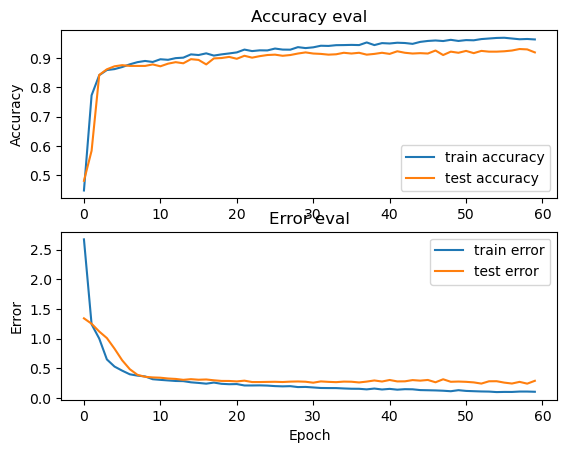

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_13.json"


def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mels"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.1))



#     # Flatten the output of the last convolutional layer
    model.add(keras.layers.GlobalMaxPooling2D())

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.1))

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

#     # Reshape input data to include batch and channel dimensions
#     X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
#     X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1) # Add channel dimension

    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=60)

    # plot accuracy/error for training and validation
    plot_history(history)



In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

41/41 - 1s - 34ms/step - accuracy: 0.9238 - loss: 0.2339

Test accuracy: 0.9238461256027222


In [ ]:
model=model.save("Model_Binary_Class_Spec1.keras")

In [ ]:
import json
import numpy as np
import tensorflow.keras as keras
import librosa
import matplotlib.pyplot as plt
class_names = {
    0: "blues",
    1: "classical"
}
# Load the trained model
model_path = "Model_Binary_Class_Spec1.keras"
model = keras.models.load_model(model_path)

# Function to extract Mel spectrogram features from audio file
def extract_mel_spectrogram(audio_file):
    y, sr = librosa.load(audio_file, sr=None)  # Load audio file
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)  # Compute Mel spectrogram
#     mel_spectrogram_normalized = librosa.util.normalize(mel_spectrogram)  # Normalize Mel spectrogram
    return mel_spectrogram.T

# Function to predict class labels for an input audio file
def predict_audio_class(audio_file, model):
    # Extract Mel spectrogram features
    mel_spectrogram = extract_mel_spectrogram(audio_file)

    # Reshape the features to match the input shape of the model
    mel_spectrogram_reshaped = mel_spectrogram.reshape(1, mel_spectrogram.shape[0], mel_spectrogram.shape[1], 1)

    # Predict class probabilities
    class_probabilities = model.predict(mel_spectrogram_reshaped)

    # Get the predicted class label
    predicted_class = np.argmax(class_probabilities)

    return predicted_class, class_probabilities

# Example usage
audio_file_path = "C:\\Users\\SAI KARTHIK\\Downloads\\archive (10)\\Data\\genres_original\\blues\\blues.00014.wav"
predicted_class, class_probabilities = predict_audio_class(audio_file_path, model)

# # Print the predicted class and class probabilities
print("Predicted class:", predicted_class)
# Retrieve the predicted class name using the class probabilities
predicted_class_name = class_names[np.argmax(class_probabilities)]

# Print the predicted class name and class probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Predicted class: 0
Predicted class: blues
Class probabilities: [[7.2101867e-01 2.7898136e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.9156115e-35 0.0000000e+00]]
